In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
dtypes = {'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float32',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float32',
        'AVProductsEnabled':                                    'float32',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float32',
        'GeoNameIdentifier':                                    'float32',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float32',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float32',
        'IeVerIdentifier':                                      'float32',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float32',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float32',
        'Census_ProcessorManufacturerIdentifier':               'float32',
        'Census_ProcessorModelIdentifier':                      'float32',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float32',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float32',
        'Census_IsFlightsDisabled':                             'float32',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float32',
        'Census_FirmwareManufacturerIdentifier':                'float32',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float32',
        'Census_IsVirtualDevice':                               'float32',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float32',
        'Wdft_IsGamer':                                         'float32',
        'Wdft_RegionIdentifier':                                'float32',
        'HasDetections':                                        'int8'}

In [2]:
df = pd.read_csv('train.csv', low_memory=True)
#df = pd.read_csv('train.csv',dtype=dtypes, low_memory=True)

C:\Users\mathg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
columncounts = df.describe(include='all').loc[['count']]/df.shape[0]
missingcolumns = columncounts.columns[(columncounts < .75).any(axis=0)]
df_reduce = df.drop(columns=missingcolumns)
df_nonan = df_reduce.dropna()
df = df_nonan

In [4]:
df_y = df['HasDetections'].copy()
df=df.drop(columns='HasDetections')
df=df.drop(columns='MachineIdentifier')
df_y.value_counts(normalize=True)

1    0.50692
0    0.49308
Name: HasDetections, dtype: float64

# AntiVirus Only Aggregate

In [7]:
AVVar_Agg = ['EngineVersion','AppVersion', 'AvSigVersion','AVProductStatesIdentifier']
df_AV_agg =df[AVVar_Agg].copy()

In [8]:
#df_AV_agg['AvSigVersion']=df_AV_agg['AvSigVersion'].str.replace('.','')
for col in AVVar_Agg[0:3] :
    df_AV_agg[col]=df_AV_agg[col].str.replace('[.,&,#,x,;]','')
    df_AV_agg[col]=df_AV_agg[col].astype(float)

<ipython-input-8-05610dbbc070>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_AV_agg[col]=df_AV_agg[col].str.replace('[.,&,#,x,;]','')


In [9]:
oldlength = np.zeros(len(AVVar_Agg))
newlength = np.zeros(len(AVVar_Agg))
keptvals = []
threshold = .99
count = 0
df_len = len(df_AV_agg)
ones= np.ones(df_len)

for col in AVVar_Agg :
    temp = df_AV_agg[col]
    temp_unique = df_AV_agg[col].unique()
    oldlength[count] = len(temp_unique)
    print(oldlength[count])
    
    if len(temp_unique) > 10 :
        cumcounts = 0
        temp_counts = temp.value_counts(normalize=True)
        temp_column = np.zeros(len(temp))
        
        for i in range(0,len(temp_counts)):
            cumcounts += temp_counts.values[i]
            #print(cumcounts)
            index = float(temp_counts.index[i])
            temp_column += ones*(temp==index)*index

            if cumcounts > threshold :
                break
        
        temp_column += ones*(temp_column == 0)*-1
        df_AV_agg[col] = temp_column
        
    newlength[count] = len(df_AV_agg[col].unique())
    print(newlength[count])
    count += 1    

60.0
9.0
104.0
28.0
7346.0
1772.0
23107.0
1320.0


# AntiVirus Variables Only

In [10]:
AVVar = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 
               'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'IsProtected', 'SMode', 
               'Firewall', 'UacLuaenable', 'Census_IsFlightsDisabled', 'Census_FlightRing', 'Census_IsSecureBootEnabled']
df_AV = df[AVVar].copy()
df_AV[AVVar_Agg] = df_AV_agg

In [11]:
del df

In [12]:
binary = ['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'IsProtected', 'SMode', 
               'Firewall', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled']
categorical = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield', 
               'AVProductsInstalled', 'AVProductsEnabled', 'UacLuaenable', 'Census_FlightRing']

In [13]:
AVPS = df_AV['AVProductStatesIdentifier']
EV = df_AV['EngineVersion']
uAVPS = AVPS.unique()
uEV = EV.unique()
nv1 = len(uAVPS)
nv2 = len(uEV)

AVPSvEV_dist = pd.DataFrame(np.zeros((nv1*nv2,12)))
for i in range(0,nv1) :
    for j in range(0,nv2) :
        Sval = uAVPS[i]
        Ival = uEV[j]
        AVPSvEV_dist.iloc[i*(nv2)+j,0] = Sval
        AVPSvEV_dist.iloc[i*(nv2)+j,1] = Ival
        AVPSvEV_dist.iloc[i*(nv2)+j,2] = np.sum((AVPS== Sval) & (EV == Ival))
        if AVPSvEV_dist.iloc[i*(nv2)+j,2] != 0 :
            AVPSvEV_dist.iloc[i*(nv2)+j,3] = np.sum(df_y[(AVPS== Sval) & (EV == Ival)])/AVPSvEV_dist.iloc[i*(nv2)+j,2]
            ncol = 1
            for col in binary :
                AVPSvEV_dist.iloc[i*(nv2)+j,3+ncol] = np.sum(df_AV[col][(AVPS== Sval) & (EV == Ival)])/AVPSvEV_dist.iloc[i*(nv2)+j,2]
                ncol += 1

In [60]:
AVPS = df_AV['AVProductStatesIdentifier']
uAVPS = AVPS.unique()
nv1 = len(uAVPS)

AVPSvHD_dist = pd.DataFrame(np.zeros((nv1,3)))
for i in range(0,nv1) :
    Sval = uAVPS[i]
    AVPSvHD_dist.iloc[i,0] = Sval
    AVPSvHD_dist.iloc[i,1] = np.sum((AVPS== Sval))
    if AVPSvHD_dist.iloc[i,1] != 0 :
        AVPSvHD_dist.iloc[i,2] = np.sum(df_y[(AVPS== Sval)])/AVPSvHD_dist.iloc[i,1]
            


In [84]:
AVPS_non_agg = df_AV_non_agg['AVProductStatesIdentifier']
uAVPS_non_agg = AVPS_non_agg.unique()
nv1 = len(uAVPS_non_agg)

AVPS_non_aggvHD_dist = pd.DataFrame(np.zeros((nv1,3)))
for i in range(0,nv1) :
    Sval = uAVPS_non_agg[i]
    AVPS_non_aggvHD_dist.iloc[i,0] = Sval
    AVPS_non_aggvHD_dist.iloc[i,1] = np.sum((AVPS_non_agg == Sval))
    if AVPS_non_aggvHD_dist.iloc[i,1] != 0 :
        AVPS_non_aggvHD_dist.iloc[i,2] = np.sum(df_y[(AVPS_non_agg== Sval)])/AVPS_non_aggvHD_dist.iloc[i,1]

In [ ]:
AVPS = df_AV['AVProductStatesIdentifier']
AVPI = df_AV['AVProductsInstalled']
uAVPS = AVPS.unique()
uAVPI = AVPI.unique()
nv1 = len(uAVPS)
nv2 = len(uAVPI)

AVPSvAVPI_dist = pd.DataFrame(np.zeros((nv1*nv2,12)))
for i in range(0,nv1) :
    for j in range(0,nv2) :
        Sval = uAVPS[i]
        Ival = uAVPI[j]
        AVPSvAVPI_dist.iloc[i*(nv2)+j,0] = Sval
        AVPSvAVPI_dist.iloc[i*(nv2)+j,1] = Ival
        AVPSvAVPI_dist.iloc[i*(nv2)+j,2] = np.sum((AVPS== Sval) & (AVPI == Ival))
        if AVPSvAVPI_dist.iloc[i*(nv2)+j,2] != 0 :
            AVPSvAVPI_dist.iloc[i*(nv2)+j,3] = np.sum(df_y[(AVPS== Sval) & (AVPI == Ival)])/AVPSvAVPI_dist.iloc[i*(nv2)+j,2]
            ncol = 1
            for col in binary :
                AVPSvAVPI_dist.iloc[i*(nv2)+j,3+ncol] = np.sum(df_AV[col][(AVPS== Sval) & (AVPI == Ival)])/AVPSvAVPI_dist.iloc[i*(nv2)+j,2]
                ncol += 1

In [23]:
AVPS = df_AV['AVProductStatesIdentifier']
AVPE = df_AV['AVProductsEnabled']
uAVPS = AVPS.unique()
uAVPE = AVPE.unique()
nv1 = len(uAVPS)
nv2 = len(uAVPE)

AVPSvAVPE_dist = pd.DataFrame(np.zeros((nv1*nv2,12)))
for i in range(0,nv1) :
    for j in range(0,nv2) :
        Sval = uAVPS[i]
        Eval = uAVPE[j]
        AVPSvAVPE_dist.iloc[i*(nv2)+j,0] = Sval
        AVPSvAVPE_dist.iloc[i*(nv2)+j,1] = Eval
        AVPSvAVPE_dist.iloc[i*(nv2)+j,2] = np.sum((AVPS== Sval) & (AVPE == Eval))
        if AVPSvAVPE_dist.iloc[i*(nv2)+j,2] != 0 :
            AVPSvAVPE_dist.iloc[i*(nv2)+j,3] = np.sum(df_y[(AVPS== Sval) & (AVPE == Eval)])/AVPSvAVPE_dist.iloc[i*(nv2)+j,2]
            #ncol = 1
            #for col in binary :
            #    AVPSvAVPE_dist.iloc[i*(nv2)+j,3+ncol] = np.sum(df_AV[col][(AVPS== Sval) & (AVPE == Eval)])/AVPSvAVPE_dist.iloc[i*(nv2)+j,2]
            #    ncol += 1

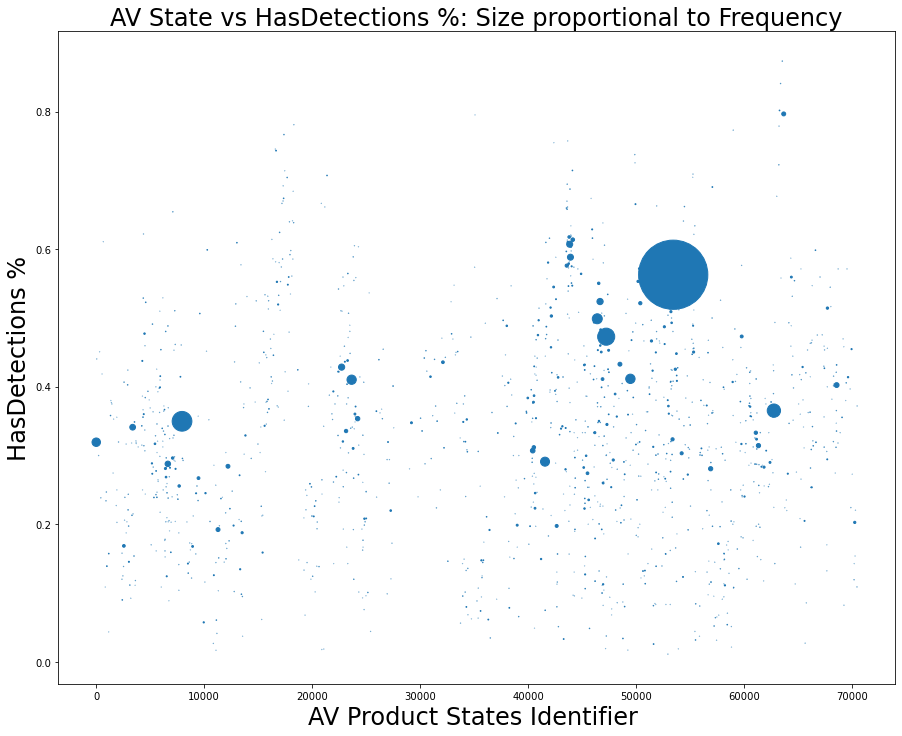

In [113]:
plt.figure(figsize=(15,12))
plt.scatter(AVPSvHD_dist.iloc[:,0], AVPSvHD_dist.iloc[:,2],
            s = AVPSvHD_dist.iloc[:,1]/1000)
            #c = AVPSvAVPI_dist.iloc[:,1], 
            #alpha = .5)
plt.xlabel("AV Product States Identifier ", fontsize=24)
plt.ylabel("HasDetections %", fontsize=24)
#plt.clim(0,np.max(AVPSvAVPI_dist.iloc[:,1]))
plt.title("AV State vs HasDetections %: Size proportional to Frequency", fontsize=24)
#plt.colorbar(label = "AV Products Installed")
#plt.xlim(1,5)
#plt.ylim(0,50)
plt.show()

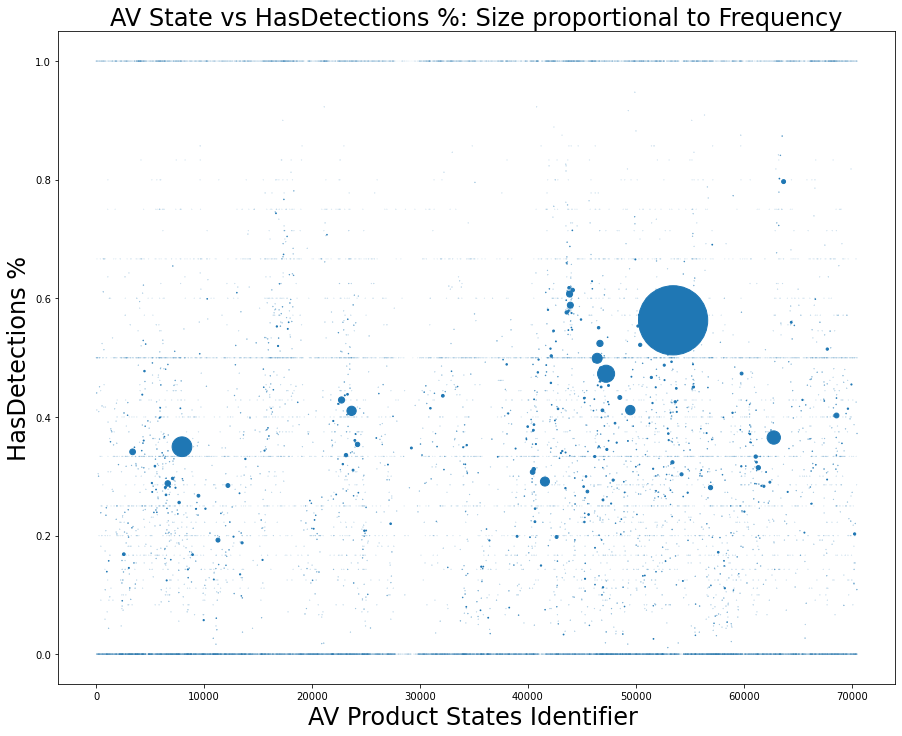

In [114]:
plt.figure(figsize=(15,12))
plt.scatter(AVPS_non_aggvHD_dist.iloc[:,0], AVPS_non_aggvHD_dist.iloc[:,2],
            s = AVPS_non_aggvHD_dist.iloc[:,1]/1000)
            #c = AVPSvAVPI_dist.iloc[:,1], 
            #alpha = .5)
plt.xlabel("AV Product States Identifier ", fontsize=24)
plt.ylabel("HasDetections %", fontsize=24)
#plt.clim(0,np.max(AVPSvAVPI_dist.iloc[:,1]))
plt.title("AV State vs HasDetections %: Size proportional to Frequency", fontsize=24)
#plt.colorbar(label = "AV Products Installed")
#plt.xlim(1,5)
#plt.ylim(0,50)
plt.show()

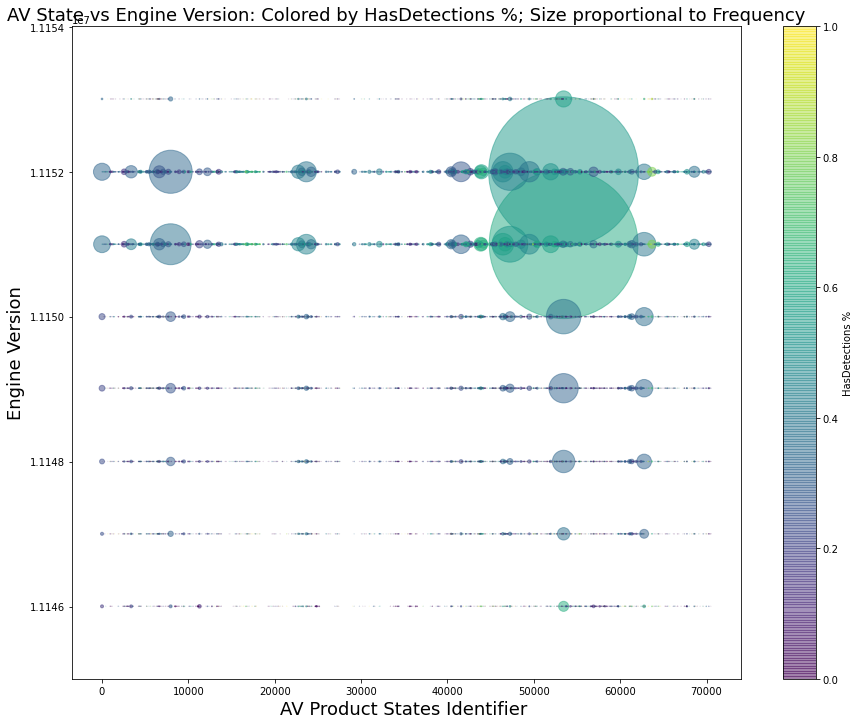

In [17]:
plt.figure(figsize=(15,12))
plt.scatter(AVPSvEV_dist.iloc[:,0], AVPSvEV_dist.iloc[:,1],
            s = AVPSvEV_dist.iloc[:,2]/100,
            c = AVPSvEV_dist.iloc[:,3], 
            alpha = .5)
plt.xlabel("AV Product States Identifier ", fontsize=18)
plt.ylabel("Engine Version", fontsize=18)
plt.clim(0,np.max(AVPSvEV_dist.iloc[:,3]))
plt.title("AV State vs Engine Version: Colored by HasDetections %; Size proportional to Frequency", fontsize=18)
plt.colorbar(label = "HasDetections %")
#plt.xlim(1,5)
plt.ylim(1.1146004e+07-1e3,1.1153006e+07+1e3)
plt.show()

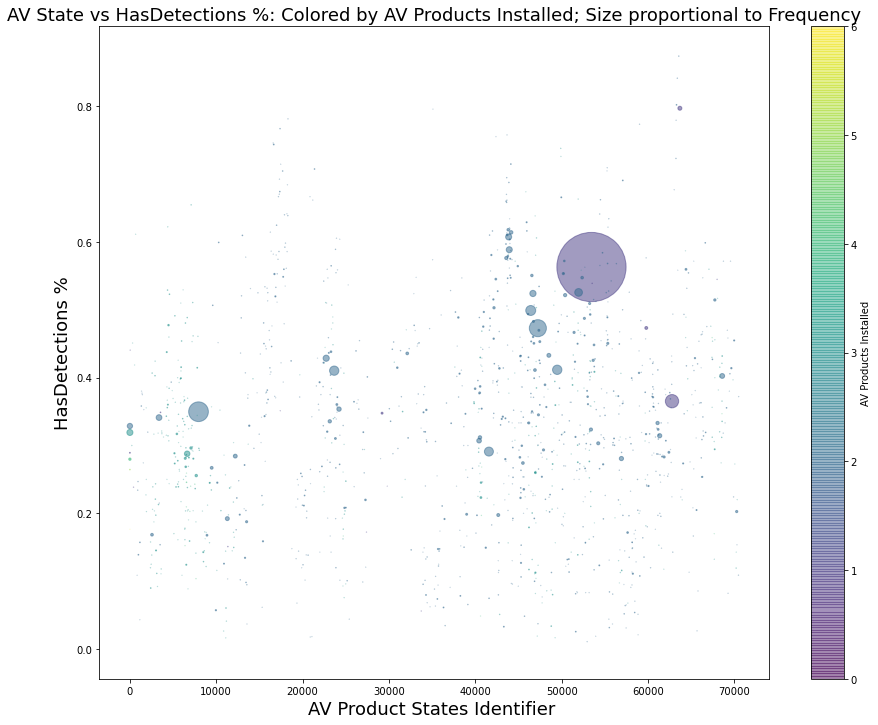

In [48]:
plt.figure(figsize=(15,12))
plt.scatter(AVPSvAVPI_dist.iloc[:,0], AVPSvAVPI_dist.iloc[:,3],
            s = AVPSvAVPI_dist.iloc[:,2]/1000,
            c = AVPSvAVPI_dist.iloc[:,1], 
            alpha = .5)
plt.xlabel("AV Product States Identifier ", fontsize=18)
plt.ylabel("HasDetections %", fontsize=18)
plt.clim(0,np.max(AVPSvAVPI_dist.iloc[:,1]))
plt.title("AV State vs HasDetections %: Colored by AV Products Installed; Size proportional to Frequency", fontsize=18)
plt.colorbar(label = "AV Products Installed")
#plt.xlim(1,5)
#plt.ylim(0,50)
plt.show()

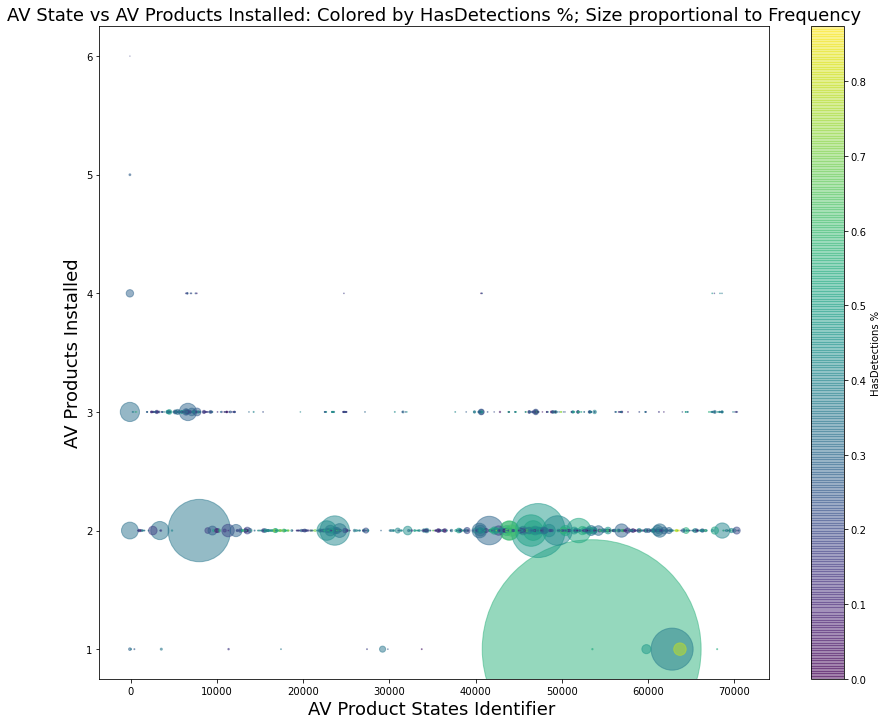

In [133]:
plt.figure(figsize=(15,12))
plt.scatter(AVPSvAVPI_dist.iloc[:,0], AVPSvAVPI_dist.iloc[:,1],
            s = AVPSvAVPI_dist.iloc[:,2]/100,
            c = AVPSvAVPI_dist.iloc[:,3], 
            alpha = .5)
plt.xlabel("AV Product States Identifier ", fontsize=18)
plt.ylabel("AV Products Installed", fontsize=18)
plt.clim(0,np.max(AVPSvAVPI_dist.iloc[:,3]))
plt.title("AV State vs AV Products Installed: Colored by HasDetections %; Size proportional to Frequency", fontsize=18)
plt.colorbar(label = "HasDetections %")
#plt.xlim(1,5)
#plt.ylim(0,50)
plt.show()

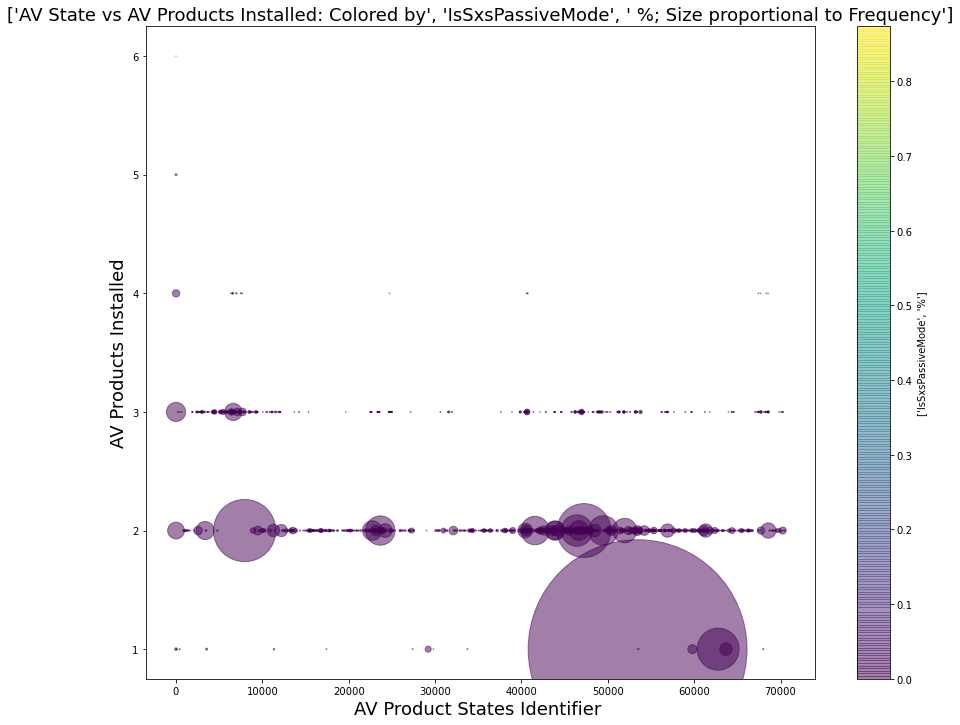

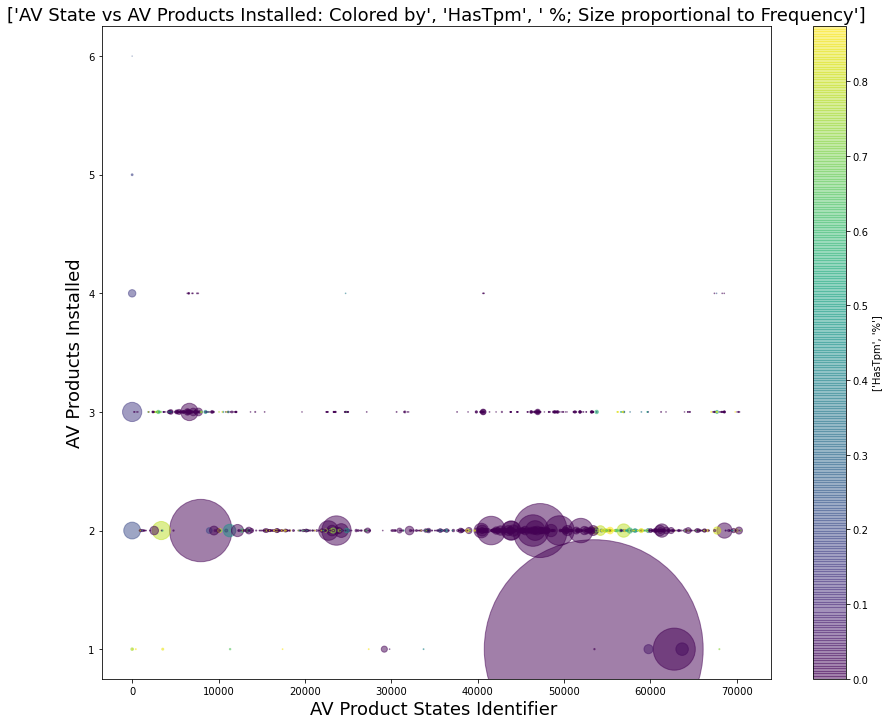

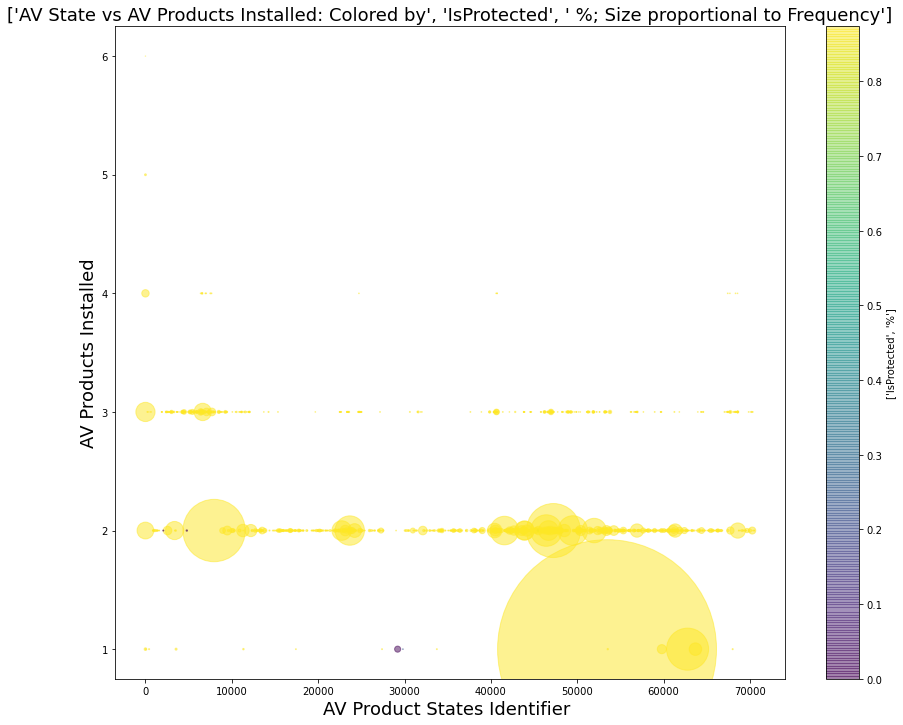

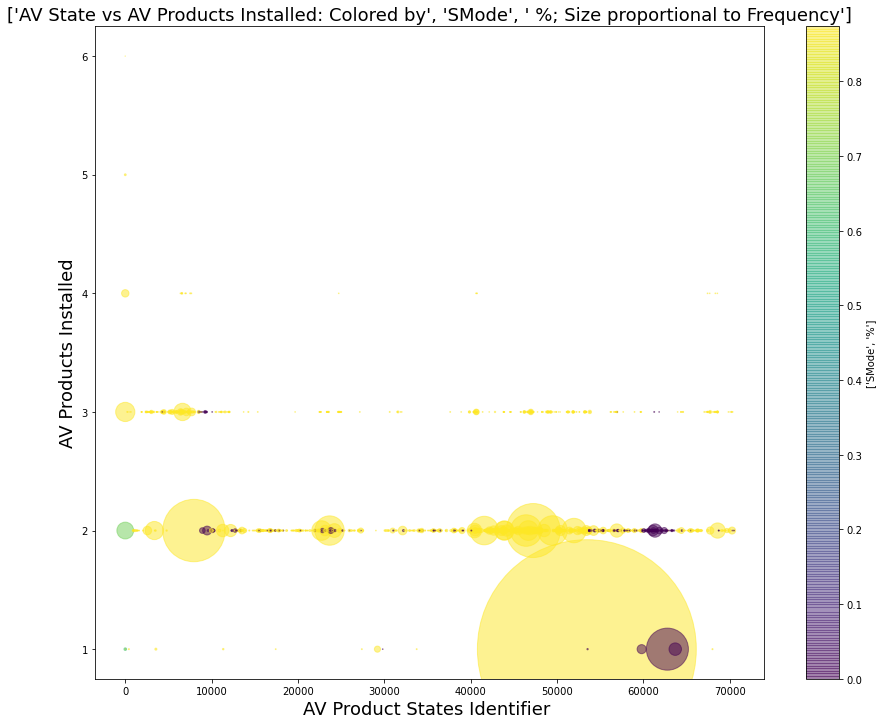

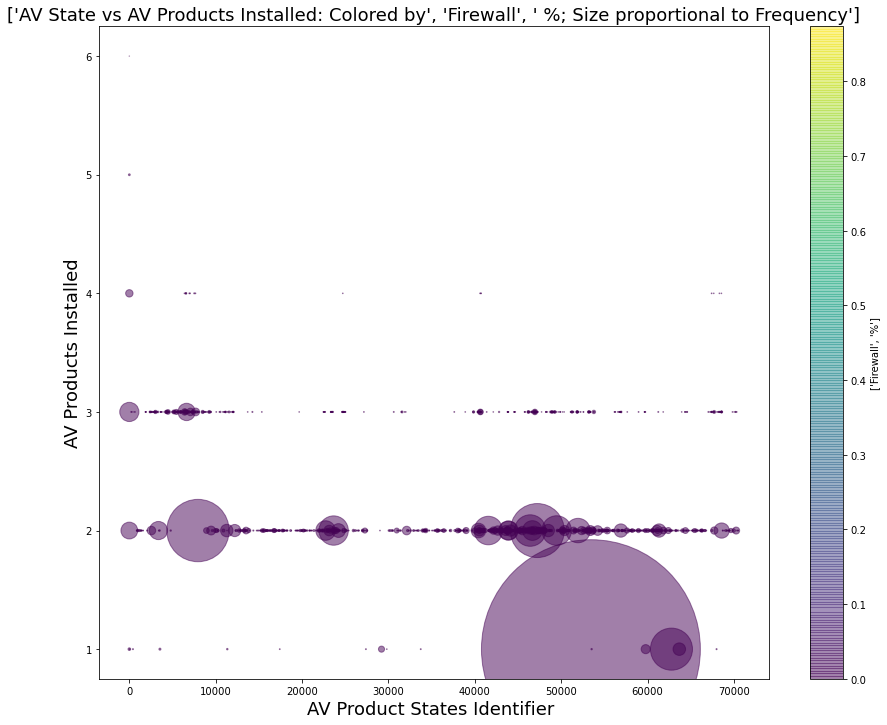

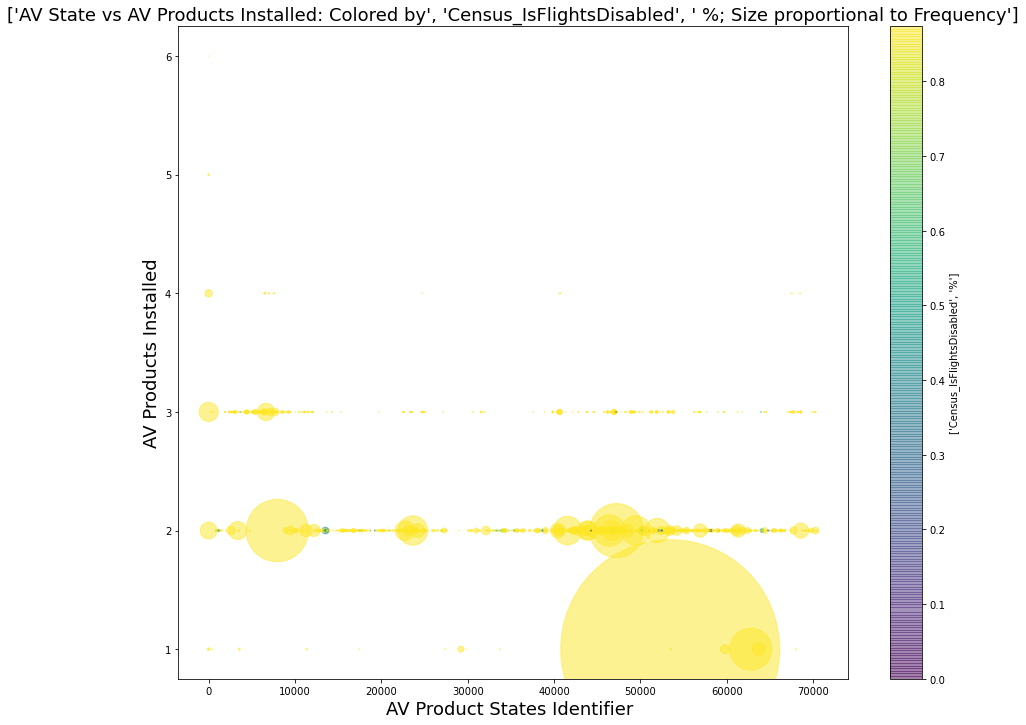

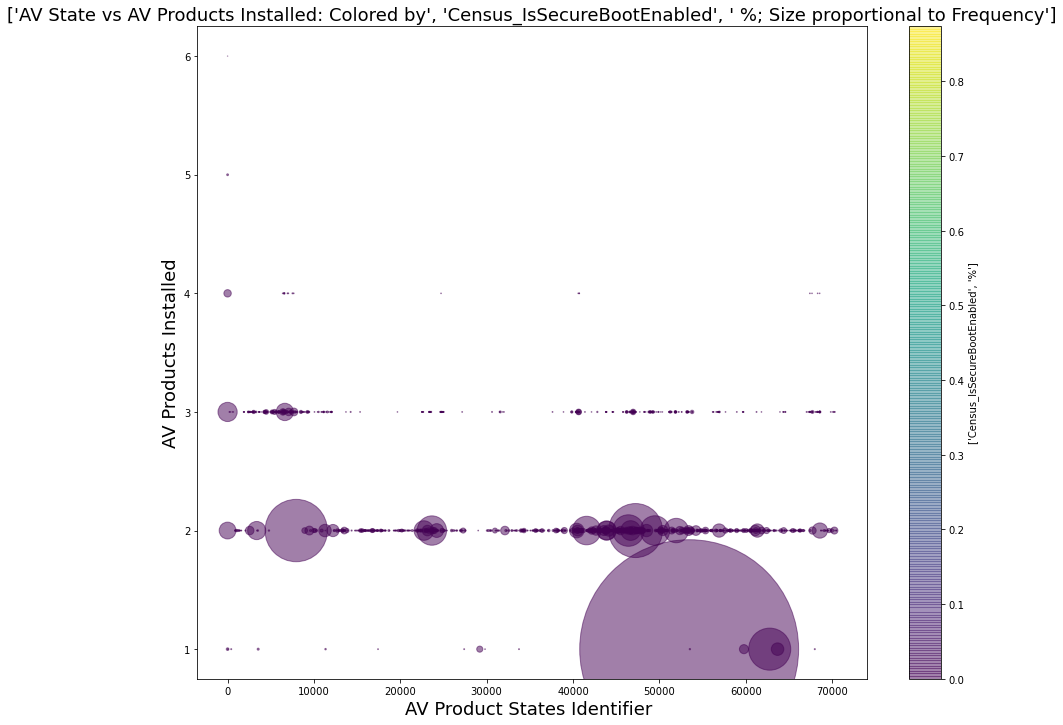

In [35]:
for i in range(1,8) :
    plt.figure(figsize=(15,12))
    plt.scatter(AVPSvAVPI_dist.iloc[:,0], AVPSvAVPI_dist.iloc[:,1],
                s = AVPSvAVPI_dist.iloc[:,2]/100,
                c = AVPSvAVPI_dist.iloc[:,3+i], 
                alpha = .5)
    plt.xlabel("AV Product States Identifier ", fontsize=18)
    plt.ylabel("AV Products Installed", fontsize=18)
    plt.clim(0,np.max(AVPSvAVPI_dist.iloc[:,3]))
    plt.title('AV State vs AV Products Installed: Colored by '+binary[i]+' %; Size proportional to Frequency', fontsize=18)
    plt.colorbar(label = binary[i]+' %')
    #plt.xlim(1,5)
    #plt.ylim(0,50)
    plt.show()

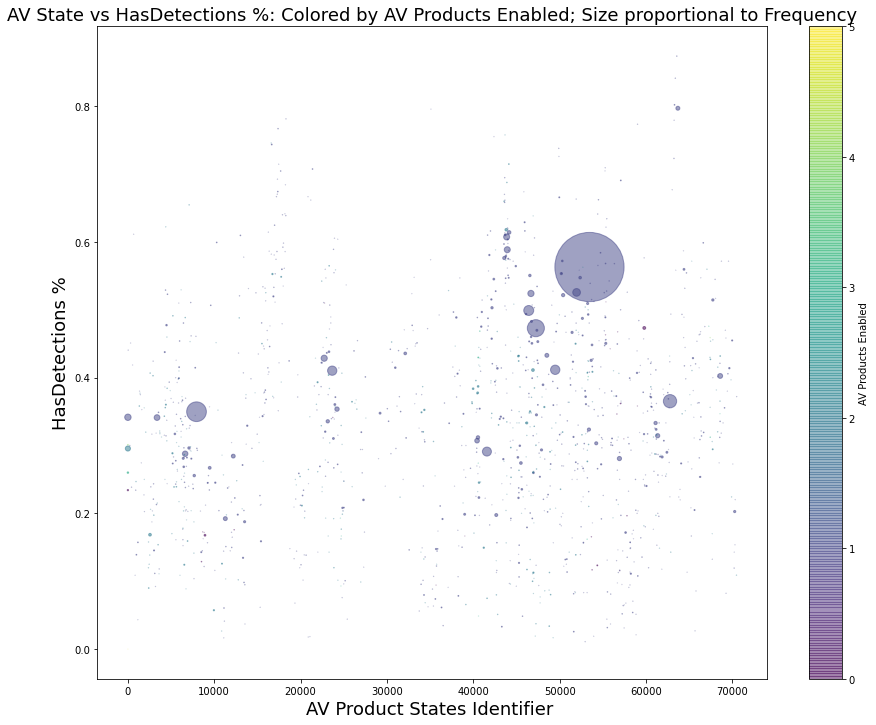

In [49]:
plt.figure(figsize=(15,12))
plt.scatter(AVPSvAVPE_dist.iloc[:,0], AVPSvAVPE_dist.iloc[:,3],
            s = AVPSvAVPE_dist.iloc[:,2]/1000,
            c = AVPSvAVPE_dist.iloc[:,1], 
            alpha = .5)
plt.xlabel("AV Product States Identifier ", fontsize=18)
plt.ylabel("HasDetections %", fontsize=18)
plt.clim(0,np.max(AVPSvAVPE_dist.iloc[:,1]))
plt.title("AV State vs HasDetections %: Colored by AV Products Enabled; Size proportional to Frequency", fontsize=18)
plt.colorbar(label = "AV Products Enabled")
#plt.xlim(1,5)
#plt.ylim(0,50)
plt.show()

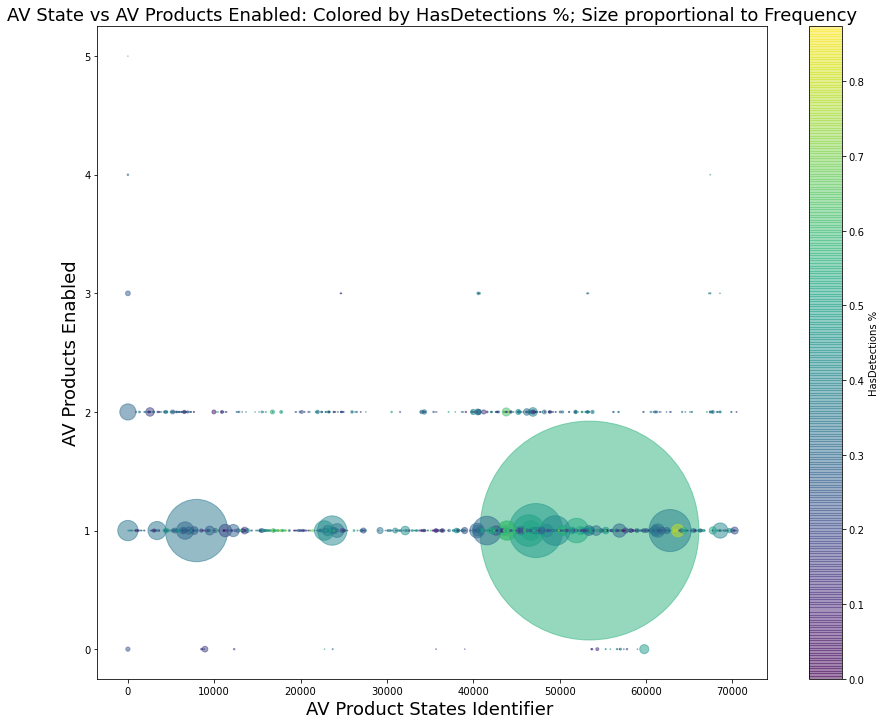

In [31]:
plt.figure(figsize=(15,12))
plt.scatter(AVPSvAVPE_dist.iloc[:,0], AVPSvAVPE_dist.iloc[:,1],
            s = AVPSvAVPE_dist.iloc[:,2]/100,
            c = AVPSvAVPE_dist.iloc[:,3], 
            alpha = .5)
plt.xlabel("AV Product States Identifier ", fontsize=18)
plt.ylabel("AV Products Enabled", fontsize=18)
plt.clim(0,np.max(AVPSvAVPI_dist.iloc[:,3]))
plt.title("AV State vs AV Products Enabled: Colored by HasDetections %; Size proportional to Frequency", fontsize=18)
plt.colorbar(label = "HasDetections %")
#plt.xlim(1,5)
#plt.ylim(0,50)
plt.show()

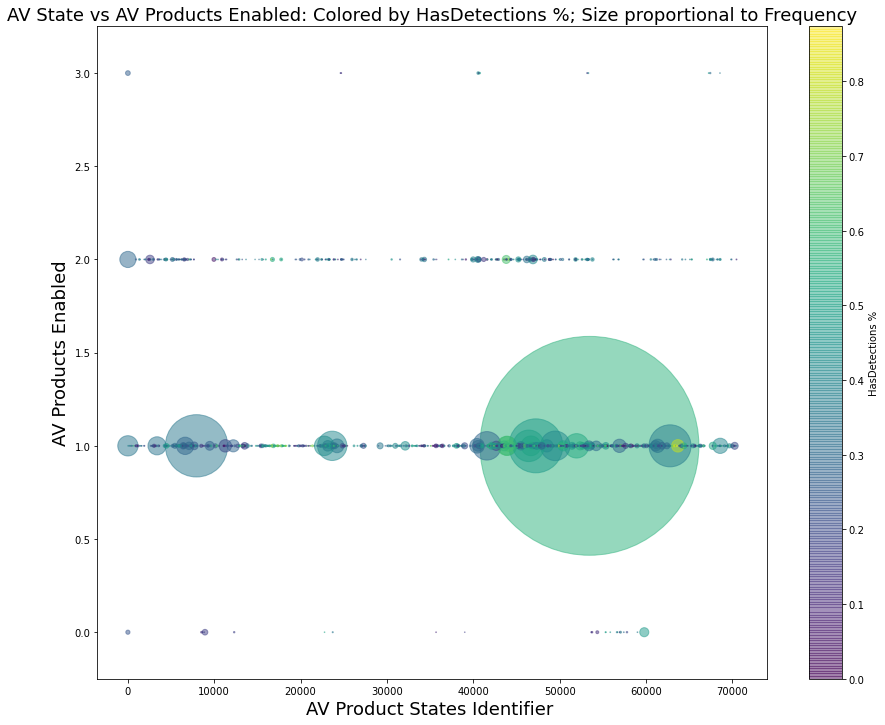

In [27]:
plt.figure(figsize=(15,12))
plt.scatter(AVPSvAVPE_dist.iloc[:,0], AVPSvAVPE_dist.iloc[:,1],
            s = AVPSvAVPE_dist.iloc[:,2]/100,
            c = AVPSvAVPE_dist.iloc[:,3], 
            alpha = .5)
plt.xlabel("AV Product States Identifier ", fontsize=18)
plt.ylabel("AV Products Enabled", fontsize=18)
plt.clim(0,np.max(AVPSvAVPE_dist.iloc[:,3]))
plt.title("AV State vs AV Products Enabled: Colored by HasDetections %; Size proportional to Frequency", fontsize=18)
plt.colorbar(label = "HasDetections %")
#plt.xlim(1,5)
plt.ylim(-0.25,3.25)
plt.show()

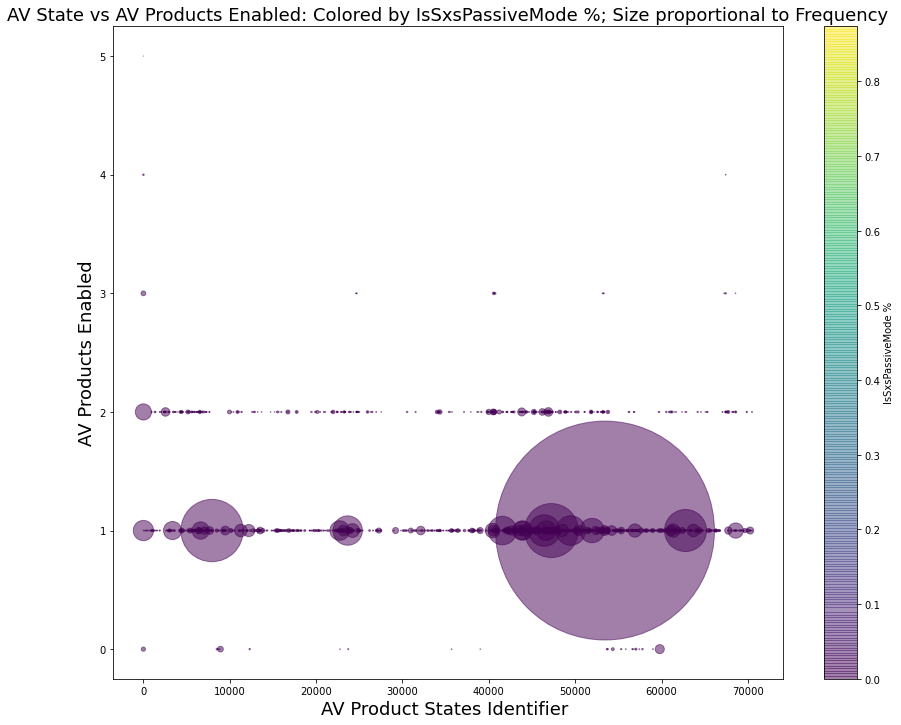

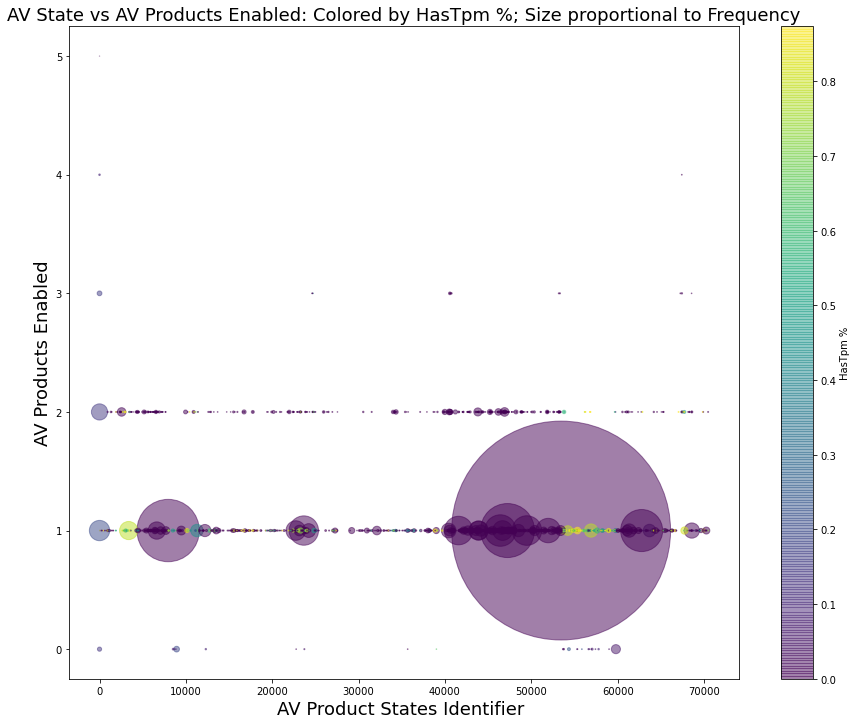

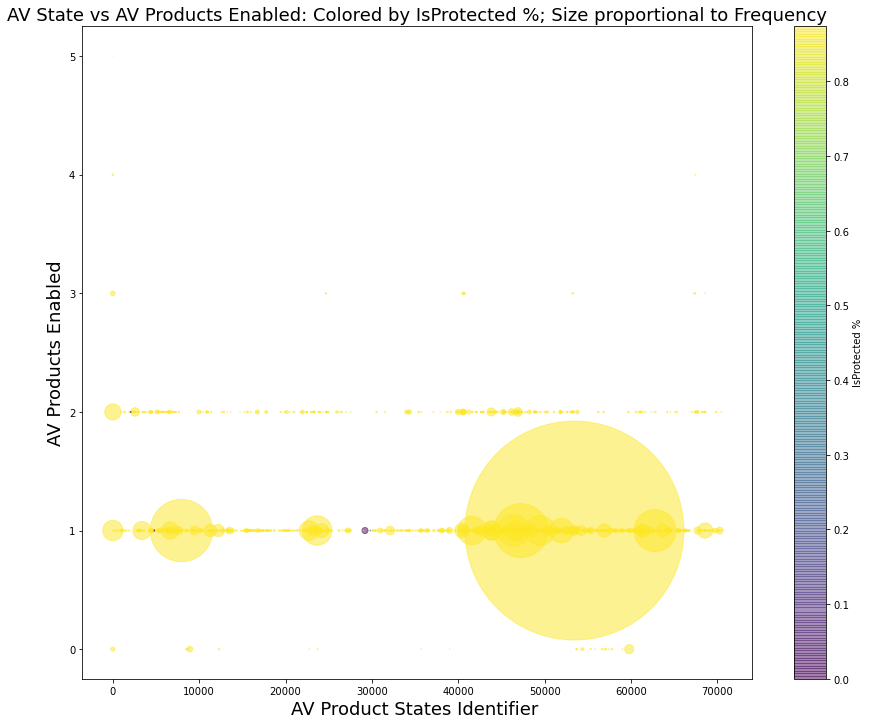

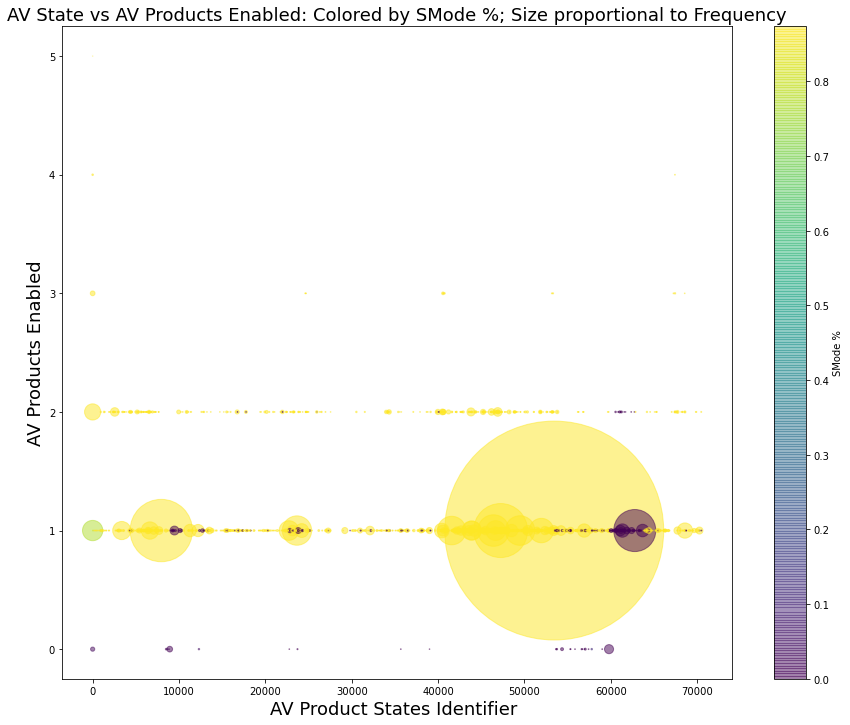

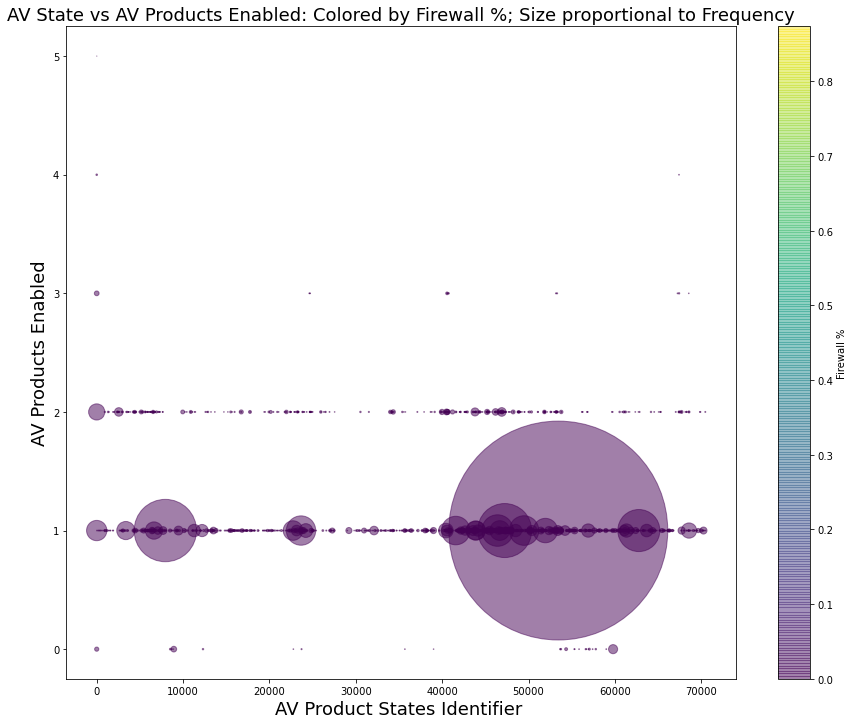

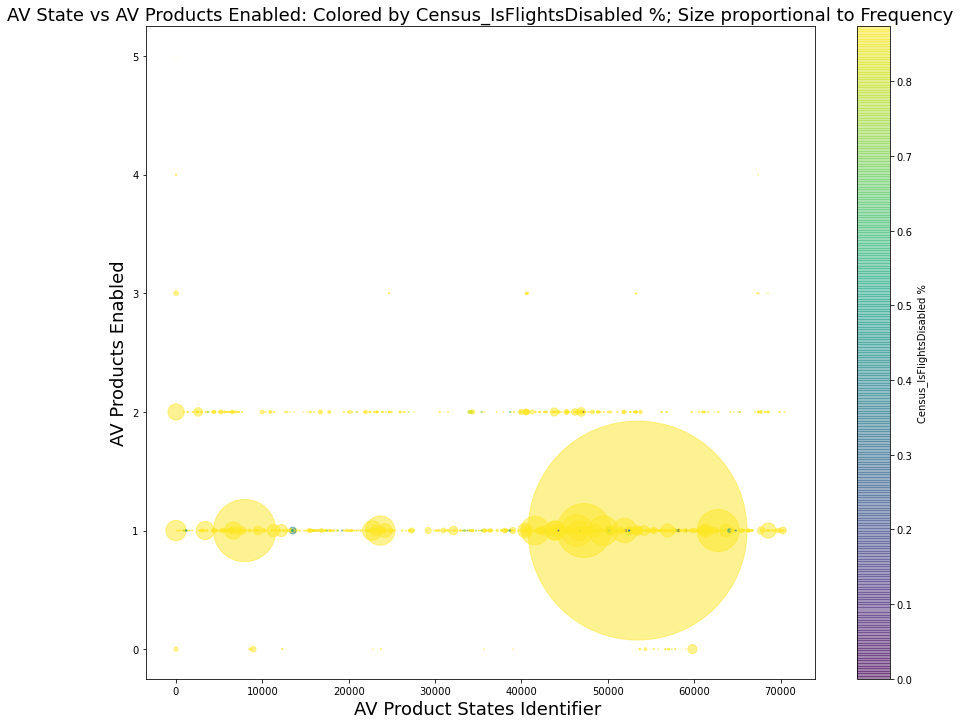

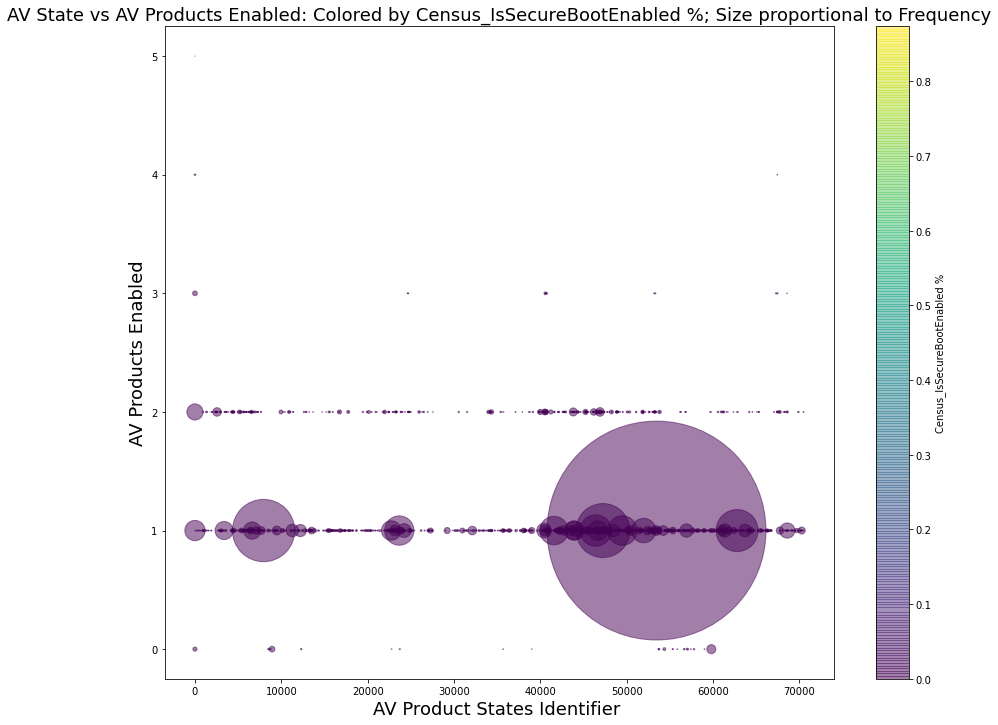

In [40]:
for i in range(1,8) :
    plt.figure(figsize=(15,12))
    plt.scatter(AVPSvAVPE_dist.iloc[:,0], AVPSvAVPE_dist.iloc[:,1],
                s = AVPSvAVPE_dist.iloc[:,2]/100,
                c = AVPSvAVPE_dist.iloc[:,3+i], 
                alpha = .5)
    plt.xlabel("AV Product States Identifier ", fontsize=18)
    plt.ylabel("AV Products Enabled", fontsize=18)
    plt.clim(0,np.max(AVPSvAVPI_dist.iloc[:,3]))
    plt.title('AV State vs AV Products Enabled: Colored by '+binary[i]+' %; Size proportional to Frequency', fontsize=18)
    plt.colorbar(label = binary[i]+' %')
    #plt.xlim(1,5)
    #plt.ylim(0,50)
    plt.show()